## Section 1.4: Interactive mode and R scripts

**The interactive mode**

The most basic way to use R is the *interactive* mode. You type commands and immediately get the result from R.

**Using R as a calculator**

Start R by typing R at the command prompt of your operating system or by executing `RGui` on Windows. Below you can see a screenshot of an interactive R session on Linux.

After the `>` sign, expressions can be typed in. Once an expression is typed, the result is shown by R. Type

In [1]:
1 + 1

[1] 2

to immediately see the result, `2`. The leading `[1]` indicates that R returns a vector. In this case, the vector contains only one number (2).

**The first plot**

R can be used to generate plots. The following example uses the data set `PlantGrowth`, which comes as an example data set along with R.

Type in the following lines which do not start with `##`. Lines starting with `##` are meant to document the result which R will return.

'data.frame':	30 obs. of  2 variables:
 $ weight: num  4.17 5.58 5.18 6.11 4.5 4.61 5.17 4.53 5.33 5.14 ...
 $ group : Factor w/ 3 levels "ctrl","trt1",..: 1 1 1 1 1 1 1 1 1 1 ...


Df Sum Sq   Mean Sq   F value  Pr(>F)    
group      2  3.76634 1.8831700 4.846088 0.01590996
Residuals 27 10.49209 0.3885959       NA         NA

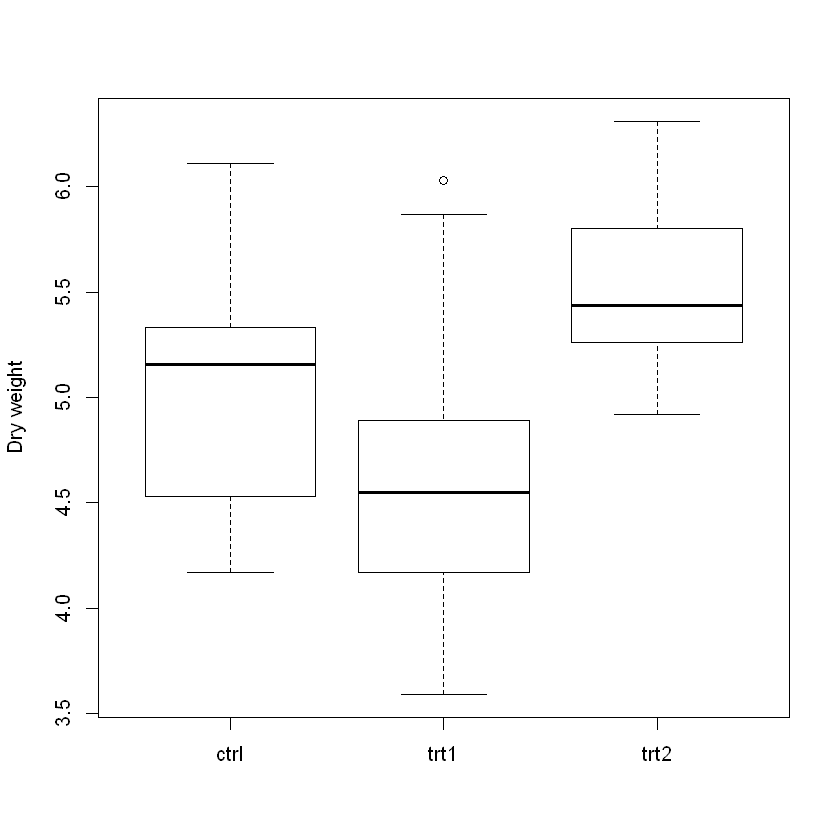

In [2]:
data(PlantGrowth)
str(PlantGrowth)
anova(lm(weight ~ group, data = PlantGrowth))
boxplot(weight ~ group, data = PlantGrowth, ylab = "Dry weight")

`data(PlantGrowth)` loads the example data set `PlantGrowth`, which is records of dry masses of plants which were subject to two different treatment conditions or no treatment at all (control group). The data set is made available under the name `PlantGrowth`. Such a name is also called a Variable.

To load your own data, the following two documentation pages might be helpful:

* Reading and writing tabular data in plain-text files (CSV, TSV, etc.)
* I/O for foreign tables (Excel, SAS, SPSS, Stata)

`str(PlantGrowth)` shows information about the data set which was loaded. The output indicates that `PlantGrowth` is a `data.frame`, which is R's name for a table. The `data.frame` consists of two columns and 30 rows. In this case, each row corresponds to one plant. Details of the two columns are shown in the lines starting the `$`: The first column is called `weight` and contains numbers (`num`, the dry weight of the respective plant). The second column, `group`, contains the treatment that the plant was subjected to. This is categorical data, which is called `factor` in R. Read more information about data frames.

 To compare the dry masses of the three different groups, a one-way ANOVA is performed using `anova(lm( ... ))`. `weight ~ group` means "Compare the values of the column `weight`, by grouping by the values of the column group". This is called a Formula in R. `data = ...` specifies the name of the table where the data can be found.

The result shows, among others, that there exists a significant difference `(Column Pr(>F)), p = 0.01591`) between some of the three groups. Post-hoc tests, like Tukey's Test, must be performed to determine which groups' means differ significantly.

`boxplot(...)` creates a box plot of the data where the values to be plotted come from `weight ~ group`, which means: "Plot the values of the column `weight` *versus* the values of the column `group`. `ylab = ...` specifies the label of the y axis. More information: Base plotting

Type `q()` or `Ctrl + D` to exit from the R session.

**R scripts**

To document your research, it is favourable to save the commands you use for calculation in a file. For that effect, you can create **R scripts**. An R script is a simple text file, containing R commands.

Create a text file with the name `plants.R`, and fill it with the following text, where some commands are familiary from the code block above:

In [4]:
data(PlantGrowth)

anova(lm(weight ~ group, data = PlantGrowth))

png("plant_boxplot.png", width = 400, height = 300)
boxplot(weight ~ group, data = PlantGrowth, ylab = "Dry weight")
dev.off()

Df Sum Sq   Mean Sq   F value  Pr(>F)    
group      2  3.76634 1.8831700 4.846088 0.01590996
Residuals 27 10.49209 0.3885959       NA         NA

png 
  2

Execute the script by typing into your terminal (The terminal of your operating system, **not** an interactive R session like in the previous section!)

``` bash
R --no-save <plant.R >plant_result.txt
```

The file `plant_result.txt` contains the results of your calculation, as if you had typed them into the interactive R prompt. Thereby, your calculations are documented.

The new commands `png` and `dev.off` are used for saving the boxplot to disk. The two commands must enclose the plotting command, as shown in the example above. `png("FILENAME", width = ..., height = ...)` opens a new PNG file with the specified file name, width and height in pixels. `dev.off()` will finish plotting and saves the plot to disk. No output is saved until `dev.off()` is called.